In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv(r'롤롤.csv',encoding='euc-kr')
#print(data.info())
data=data.drop('gameId',axis=1)

data=data[data.columns[:20]]
data=data.drop(['B토탈골드','B경험치','B엘리트몬스터','B전령','BCS','B분당골드'],axis=1)
y=data['B승']
X=data.drop('B승',axis=1)


from sklearn.preprocessing import StandardScaler#수치형
from sklearn.preprocessing import LabelEncoder#범주형



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,make_scorer#정확도,민감도등
from sklearn.metrics import roc_curve #roc곡선그리기



#최적화
from sklearn.model_selection import cross_validate #교차타당도
from sklearn.pipeline import make_pipeline#파이프라인구축
from sklearn.model_selection import learning_curve#학습곡선,검증곡선
from sklearn.model_selection import GridSearchCV #하이퍼파라미티튜닝

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=\
    train_test_split(X,y,
    test_size=0.4,
    train_size=0.6,
    random_state=12354,
    shuffle=True)
y_train

3326    0
5474    0
3203    1
4329    0
7489    1
       ..
7729    1
5333    1
4731    1
3370    0
22      0
Name: B승, Length: 5927, dtype: int64

In [2]:
tree=DecisionTreeClassifier(criterion='gini',splitter='best')

tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

confmat1=pd.DataFrame(confusion_matrix(y_test,y_pred),
index=['true[0]','true[1]'],
columns=['predict[0]','predict[1]'])
#메트릭스 형태로 현재모델의 평가
print(confmat1)
print(classification_report(y_test,y_pred))

         predict[0]  predict[1]
true[0]        1217         708
true[1]         723        1304
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1925
           1       0.65      0.64      0.65      2027

    accuracy                           0.64      3952
   macro avg       0.64      0.64      0.64      3952
weighted avg       0.64      0.64      0.64      3952



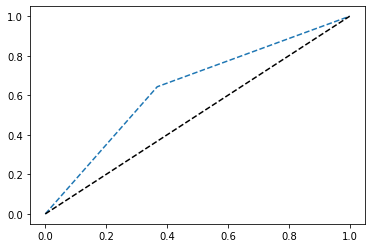

In [3]:
fpr,tpr,thresholds=roc_curve(y_test,tree.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,'--',label='Decision Tree')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr],[tpr],'r-',ms=10)
plt.show()

In [4]:
sourses=cross_validate(estimator=tree,
X=X_train,
y=y_train,
scoring=['accuracy'],
cv=10,
n_jobs=-1,
return_train_score=False)

In [5]:
print(sourses['test_accuracy'])#cv정확도점수
print(np.mean(sourses['test_accuracy']),np.std(sourses['test_accuracy'])) #cv정확도

[0.66273187 0.6222597  0.6762226  0.6222597  0.6762226  0.65598651
 0.64249578 0.6402027  0.68074324 0.63344595]
0.6512570643999818 0.021137452092489763


In [6]:
pipe_tree=make_pipeline(DecisionTreeClassifier())

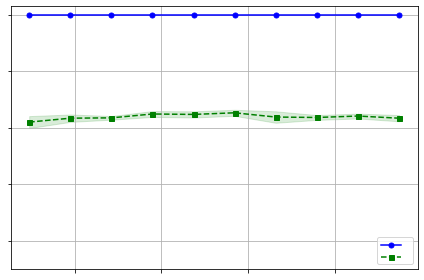

In [7]:
train_sizes,train_scores,test_scores=\
    learning_curve(estimator=pipe_tree,#수정
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    n_jobs=1)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,
color='blue',marker='o',
markersize=5,label='training accuracy')

plt.fill_between(train_sizes,
train_mean+train_std,
train_mean-train_std,
alpha=0.5,color='blue')

plt.plot(train_sizes,test_mean,
color='green',linestyle='--',
marker='s',markersize=5,
label='validation accuracy')

plt.fill_between(train_sizes,
test_mean+test_std,
test_mean-test_std,
alpha=0.15,color='green')

plt.grid()
plt.xlabel('number of trainning samples')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim([0.1,1.03])#수정  y값의 범위
plt.tight_layout()
#
plt.show()
#언더피팅 문제발견

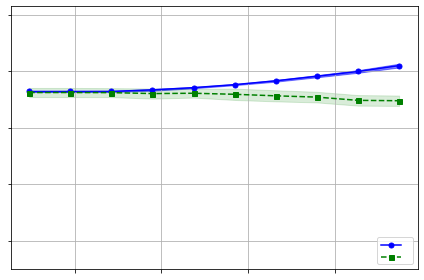

In [8]:
from sklearn.model_selection import validation_curve #교차타당도

param_range=[1,2,3,4,5,6,7,8,9,10]#수정  가치지기 몇개 해줄거냐
train_scores,test_scores=validation_curve(
    estimator=pipe_tree,#수정
    X=X_train,
    y=y_train,
    param_name='decisiontreeclassifier__max_depth',#수정 pipe_tree.get_params().keys()문장이용하여
    #필요한걸 복사 삽입
    param_range=param_range,
    cv=10)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,
color='blue',marker='o',
markersize=5,label='training accuracy')

plt.fill_between(train_sizes,
train_mean+train_std,
train_mean-train_std,
alpha=0.5,color='blue')

plt.plot(train_sizes,test_mean,
color='green',linestyle='--',
marker='s',markersize=5,
label='validation accuracy')

plt.fill_between(train_sizes,
test_mean+test_std,
test_mean-test_std,
alpha=0.15,color='green')

plt.grid()
plt.xlabel('number of max_depth')#수정
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim([0.1,1.03])#수정  y값의 범위
plt.tight_layout()
plt.show()
#

In [9]:
param_range1=[1,2,3,4,5,6,7,8,9,10]#수정
param_range2=[10,20,30,40,50,60]#수정
param_range3=[0.0,0.1,0.5,0.4,0.8]


param_grid=[{'decisiontreeclassifier__max_depth':param_range1,#수정
'decisiontreeclassifier__min_samples_leaf':param_range2}]#수정,
#'decisiontreeclassifier__min_impurity_split':param_range3}]

gs=GridSearchCV(estimator=pipe_tree,#수정
param_grid=param_grid,
scoring='accuracy',
cv=10,n_jobs=-1)
#하이퍼파라메터를 동시에 두고 최적화 패키지를 찾아줌
gs=gs.fit(X_train,y_train)

#print(gs.best_score_)#
print(gs.best_params_)#가장 나은 가치지기수가장 적합한 최소 샘플 갯수

#모델최적화검정

best_tree=gs.best_estimator_
clf=best_tree.fit(X_train,y_train)
y_pred_tree=best_tree.predict(X_test)

confmat2=pd.DataFrame(confusion_matrix(y_test,y_pred_tree),
index=['True[0]','True[1]'],
columns=['Predict[0]','predict[1]'])
print(confmat2)

{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 30}
         Predict[0]  predict[1]
True[0]        1345         580
True[1]         554        1473


In [10]:
print(classification_report(y_test,y_pred_tree))
print(pipe_tree.get_params().keys())

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1925
           1       0.72      0.73      0.72      2027

    accuracy                           0.71      3952
   macro avg       0.71      0.71      0.71      3952
weighted avg       0.71      0.71      0.71      3952

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])


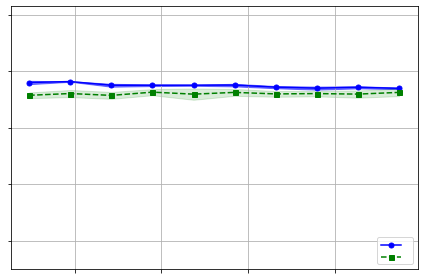

In [11]:
train_sizes,train_scores,test_scores=\
    learning_curve(estimator=best_tree,#수정
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    n_jobs=1)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,
color='blue',marker='o',
markersize=5,label='training accuracy')

plt.fill_between(train_sizes,
train_mean+train_std,
train_mean-train_std,
alpha=0.5,color='blue')

plt.plot(train_sizes,test_mean,
color='green',linestyle='--',
marker='s',markersize=5,
label='validation accuracy')

plt.fill_between(train_sizes,
test_mean+test_std,
test_mean-test_std,
alpha=0.15,color='green')

plt.grid()
plt.xlabel('number of trainning samples')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim([0.1,1.03])#수정  y값의 범위
plt.tight_layout()
#
plt.show()

In [12]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os
from IPython.display import Image #cart tree그림
clf=DecisionTreeClassifier(max_depth= 5,min_samples_leaf= 30,
                          criterion='gini')
clf=clf.fit(X_train,y_train)

os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'
feature_names=X.columns.tolist()#x의컬럼을저장
target_name=np.array(['no','yes'])

dot_data=export_graphviz(clf,
filled=True,
rounded=True,
class_names=target_name,
feature_names=feature_names,
                        out_file=None)

graph=pydotplus.graph_from_dot_data(dot_data)#그래프로 나타냄
graph.write_png('롤 디시션.png')

True